In [ ]:
from IPython.display import HTML

HTML("""
<h2>¿Qué es Seaborn?</h2>

<p><strong>Seaborn</strong> es una librería de visualización de datos en Python basada en <strong>Matplotlib</strong>, que proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos y fáciles de interpretar.</p>

<p>Seaborn facilita:</p>
<ul>
  <li>Visualizaciones estadísticas como <em>boxplots</em>, <em>violin plots</em>, <em>heatmaps</em>, <em>pair plots</em>, <em>regresiones lineales</em>, etc.</li>
  <li>Trabajar directamente con DataFrames de <code>pandas</code>.</li>
  <li>Aplicar estilos estéticos consistentes y más agradables que los gráficos por defecto de <code>Matplotlib</code>.</li>
</ul>

<style>
    h2 { color: #2c3e50; }
    p, li { font-size: 16px; line-height: 1.5; }
    ul { margin-top: 0; }
</style>
""")




In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

# Dataset de ejemplo
df = sns.load_dataset("iris")

# Scatterplot con Seaborn
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
plt.title("Largo vs Ancho del Sépalo")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # for sample data
from matplotlib.lines import Line2D  # for legend handle

# DataFrame used for all options
diamonds = sns.load_dataset('diamonds')

In [ ]:
diamonds.head()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

colors = {'D':'tab:blue', 'E':'tab:orange', 'F':'tab:green', 'G':'tab:red', 'H':'tab:purple', 'I':'tab:brown', 'J':'tab:pink'}

ax.scatter(diamonds['carat'], diamonds['price'], c=diamonds['color'].map(colors))

# add a legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
# sns.scatterplot(x='carat', y='price', data=diamonds, hue='color', ec=None)
# sns.lmplot(x='carat', y='price', data=diamonds, hue='color', fit_reg=False)

# Diccionario de colores por cada categoría de 'color'
colors = {'D': 'tab:blue', 'E': 'tab:orange', 'F': 'tab:green', 
          'G': 'tab:red', 'H': 'tab:purple', 'I': 'tab:brown', 'J': 'tab:pink'}

# Crear FacetGrid: un subplot por cada valor de 'color'
g = sns.FacetGrid(data=diamonds, col="color", col_wrap=4)

# Función personalizada para aplicar color específico
def colored_scatter(data, color=None, **kwargs):
    color_key = data['color'].iloc[0]
    sns.scatterplot(data=data, x="carat", y="price", color=colors[color_key], **kwargs)

# Mapear función al grid
g.map_dataframe(colored_scatter, alpha=0.6)

# Etiquetas y ajustes
g.set_axis_labels("Carat", "Price")
g.set_titles(col_template="{col_name}")
g.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
df = sns.load_dataset("penguins")

g = sns.FacetGrid(df, col="species", row="sex", hue="island")
g.map_dataframe(sns.scatterplot, x="flipper_length_mm", y="body_mass_g")
g.add_legend();

# Generar graficos con ejes compartidos (sobre todo en casos de uso con temporalidad)

In [ ]:
url_local = "./storage/ventas_dataset_actdeclase.csv"
ventas_df = pd.read_csv(url_local, sep=",")

In [ ]:
ventas_df.head()

In [ ]:
# Asegurarse que la columna Mes sea fecha
ventas_df["Mes"] = pd.to_datetime(ventas_df["Mes"])

In [ ]:
def graficar_ventas_todos_los_productos(ventas_df):
    # Asegurar que 'Mes' sea datetime y esté ordenado
    ventas_df = ventas_df.copy()
    
    ventas_df["Mes"] = pd.to_datetime(ventas_df["Mes"])
    ventas_df = ventas_df.sort_values("Mes")
    
    # Crear el gráfico
    plt.figure(figsize=(14, 6))
    
    sns.lineplot(
        data=ventas_df,
        x="Mes",
        y="Ventas",
        hue="Producto",
        marker="o"
    )
    plt.title("Ventas por Producto a lo largo del tiempo")
    plt.xlabel("Mes")
    plt.ylabel("Ventas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
graficar_ventas_todos_los_productos(ventas_df)

In [ ]:
# ordeno por ventas
ventas_df = ventas_df.sort_values("Mes")

# obtengo los productos unicos
productos = ventas_df["Producto"].unique()

# Función para graficar todas las métricas por producto
def graficar_todos_los_productos(ventas_df):
    for producto in productos:
        ventas_df_prod = ventas_df[ventas_df["Producto"] == producto]
        
        # Crear figura con 3 subplots
        fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
        
        sns.lineplot(data=ventas_df_prod, x="Mes", y="Ventas", hue="Region", ax=axes[0], marker="o")
        axes[0].set_title(f"{producto} - Ventas")

        sns.lineplot(data=ventas_df_prod, x="Mes", y="Satisfaccion_Cliente", hue="Region", ax=axes[1], marker="o")
        axes[1].set_title(f"{producto} - Satisfacción del Cliente")

        sns.lineplot(data=ventas_df_prod, x="Mes", y="Costo_Operativo", hue="Region", ax=axes[2], marker="o")
        axes[2].set_title(f"{producto} - Costo Operativo")

        plt.suptitle(f"Métricas para {producto}", fontsize=16)
        plt.xticks(rotation=45)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

In [ ]:
# Aseguramos fechas ordenadas
ventas_df["Mes"] = pd.to_datetime(ventas_df["Mes"])

ventas_df =  ventas_df.sort_values(by=["Producto","Mes"])


g = sns.FacetGrid(
    ventas_df,
    row="Producto",  # <- cambia col por row
    hue="Region",
    height=3,
    aspect=2,  # más ancho para cada fila
    sharex=True,
    sharey=True
)

g.map(sns.lineplot, "Mes", "Ventas", marker="o").add_legend()

g.set_titles(row_template="{row_name}")
g.set_axis_labels("Mes", "Ventas")

# Rotar etiquetas del eje X
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()



In [ ]:
# Aseguramos fechas ordenadas
ventas_df["Mes"] = pd.to_datetime(ventas_df["Mes"])

def plot_with_labels(data, color, label=None):
    ax = plt.gca()
    sns.lineplot(data=data, x="Mes", y="Ventas", hue="Region", marker="o", ax=ax, legend=False)
    for _, row in data.iterrows():
        ax.text(row["Mes"], row["Ventas"], f'{row["Ventas"]:.0f}', color='black', ha='center', va='bottom', fontsize=8)

# Crear FacetGrid con etiquetas
g = sns.FacetGrid(ventas_df, col="Producto", col_wrap=3, height=4, aspect=1.5)
g.map_dataframe(plot_with_labels)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Mes", "Ventas")

# Rotar etiquetas del eje X
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


In [ ]:
graficar_todos_los_productos(ventas_df)

In [40]:
df_ejercicio = sns.load_dataset('exercise')

In [41]:
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns')
df_ejercicio.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [42]:
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']

Los valores comunes de kind son:

* "hist" → Histograma
* "kde" → Densidad (KDE)
* "ecdf" → Función de distribución acumulada



<Figure size 640x480 with 0 Axes>

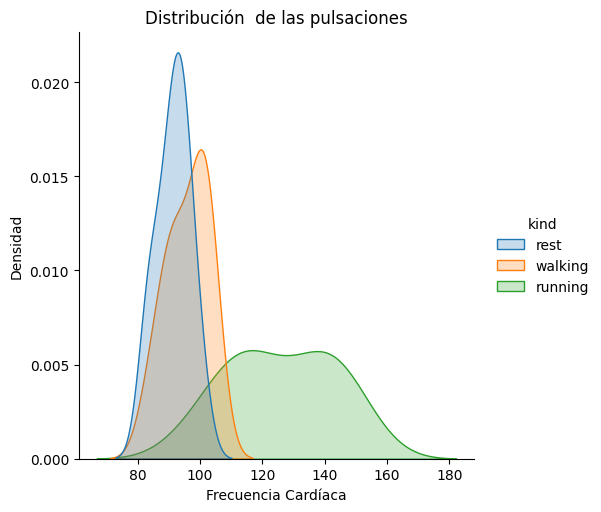

In [50]:
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')
plt.show();

# Realizar un grafico de 3 dimensiones

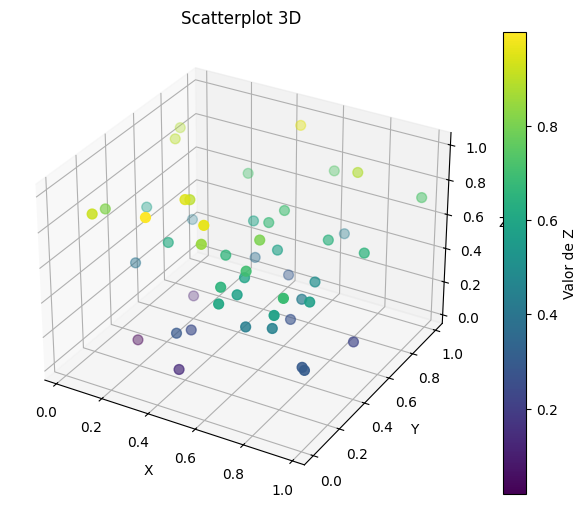

In [52]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # Aunque no se usa directamente, es necesario importarlo
import numpy as np

# Datos de ejemplo
np.random.seed(0)
x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)

# Crear figura y ejes 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Etiquetas
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Scatterplot 3D')

# Barra de color
fig.colorbar(scatter, ax=ax, label='Valor de Z')

plt.show()


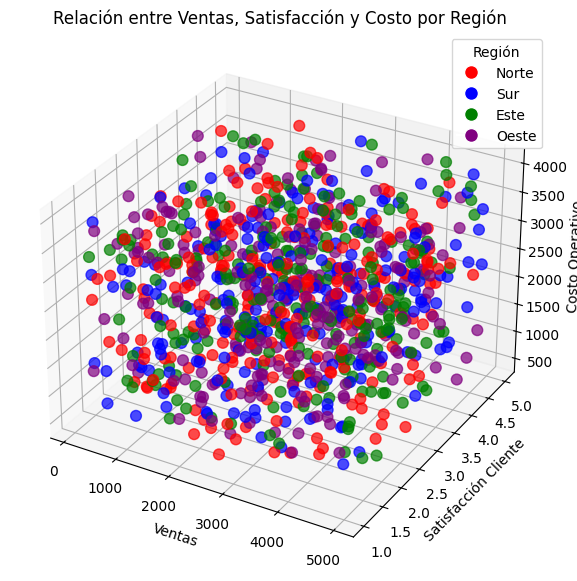

In [54]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import pandas as pd
# import numpy as np

# Simulamos un dataset realista
np.random.seed(42)
n = 1000

data = {
    'Ventas': np.random.randint(100, 5000, n),  # ventas entre 100 y 5000
    'Satisfaccion_Cliente': np.random.uniform(1, 5, n),  # puntaje 1 a 5
    'Costo_Operativo': np.random.randint(500, 4000, n),  # costo entre 500 y 4000
    'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n),
    'Producto': np.random.choice(['Producto_A', 'Producto_B', 'Producto_C'], n)
}

df = pd.DataFrame(data)

# Crear figura y ejes 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Mapear color por Región
colores = {'Norte': 'red', 'Sur': 'blue', 'Este': 'green', 'Oeste': 'purple'}
colors = df['Region'].map(colores)

# Scatter plot 3D
scatter = ax.scatter(
    df['Ventas'], 
    df['Satisfaccion_Cliente'], 
    df['Costo_Operativo'], 
    c=colors, 
    s=60, 
    alpha=0.7,
    label=df['Region']
)

# Etiquetas
ax.set_xlabel('Ventas')
ax.set_ylabel('Satisfacción Cliente')
ax.set_zlabel('Costo Operativo')
ax.set_title('Relación entre Ventas, Satisfacción y Costo por Región')

# Leyenda personalizada
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=reg, 
                          markerfacecolor=col, markersize=10) for reg, col in colores.items()]
ax.legend(handles=legend_elements, title="Región")

plt.show()
